# Letter Recognition

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import joblib
import matplotlib.pyplot as plt
import os

In [2]:
def enhance_contrast_and_threshold(img, threshold=128):
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(3.0)  # Adjust the factor as needed

    # Convert to grayscale and apply binary threshold
    bw = ImageOps.grayscale(enhanced_img)
    bw = bw.point(lambda p: p > threshold and 255)

    return bw

In [3]:
def preprocess_image(image_path):
    img = Image.open(image_path)

    # Apply the same preprocessing used during training
    preprocessed_img = enhance_contrast_and_threshold(img)

    # Resize the images for display purposes
    original_img_display = img.resize((64, 64))
    processed_img_display = preprocessed_img.resize((64, 64))

    # Resize the image to match the input size expected by the model
    preprocessed_img = preprocessed_img.resize((64, 64))
    img_array = np.array(preprocessed_img)
    img_array = img_array.reshape((1, 64, 64, 1))
    img_array = img_array / 255.0  # Normalize pixel values

    return original_img_display, processed_img_display, img_array

In [4]:
# Load the saved model and encoder
loaded_model = load_model("letter_recognition_model.h5")
label_encoder = joblib.load("letter_label_encoder.joblib")

1/1 [==============================] - 0s 134ms/step


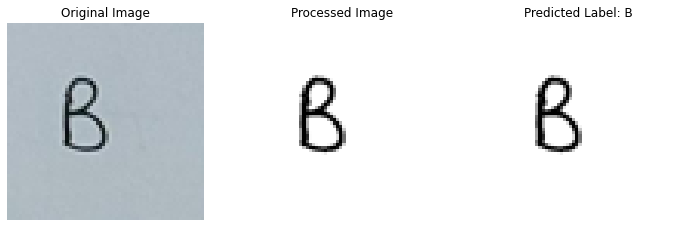

1/1 [==============================] - 0s 28ms/step


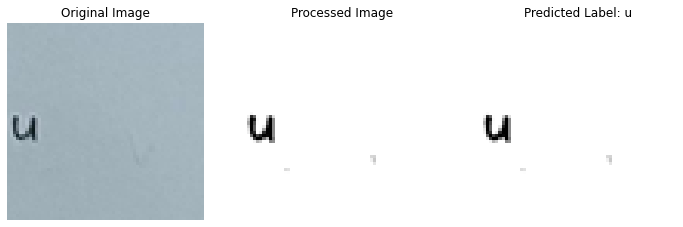

1/1 [==============================] - 0s 19ms/step


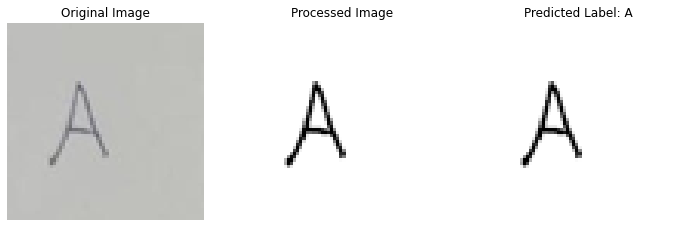

1/1 [==============================] - 0s 20ms/step


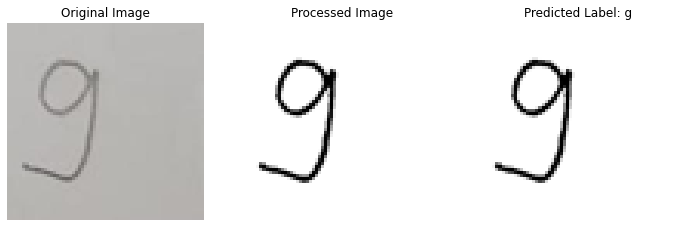

1/1 [==============================] - 0s 17ms/step


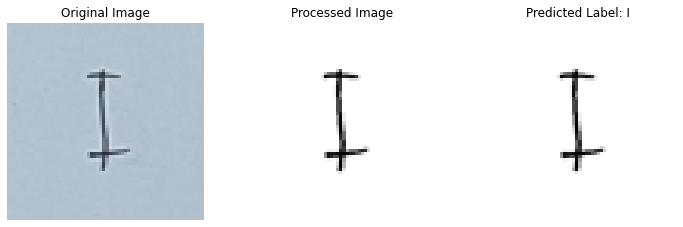

1/1 [==============================] - 0s 26ms/step


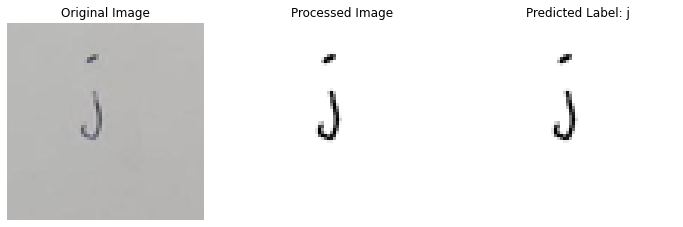

1/1 [==============================] - 0s 18ms/step


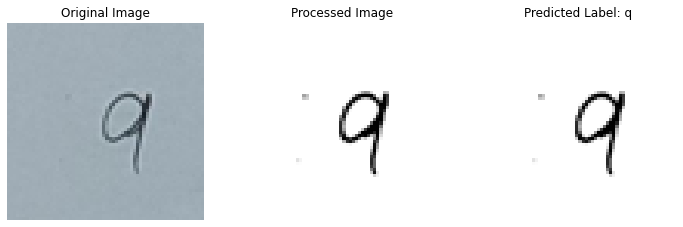

1/1 [==============================] - 0s 27ms/step


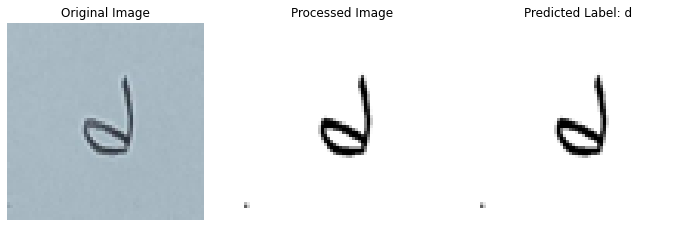

In [5]:
# path to the demo images folder
demo_images_folder ="demo_images"

# list of image files in the folder
image_files = [f for f in os.listdir(demo_images_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(demo_images_folder, image_file)

    # Preprocess the image for prediction
    original_img_display, processed_img_display, preprocessed_image = preprocess_image(image_path)

    if preprocessed_image is not None:
        # Make a prediction
        prediction = loaded_model.predict(preprocessed_image)

        # Decode the predicted label
        predicted_label = label_encoder.classes_[np.argmax(prediction)]

        # Display the result
        plt.figure(figsize=(12, 4))

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(original_img_display)
        plt.title("Original Image")
        plt.axis("off")

        # Processed image
        plt.subplot(1, 3, 2)
        plt.imshow(processed_img_display, cmap='gray')
        plt.title("Processed Image")
        plt.axis("off")

        # Predicted label
        plt.subplot(1, 3, 3)
        plt.imshow(processed_img_display, cmap='gray')
        plt.title(f"Predicted Label: {predicted_label}")
        plt.axis("off")

        plt.show()


# Person Recognition

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


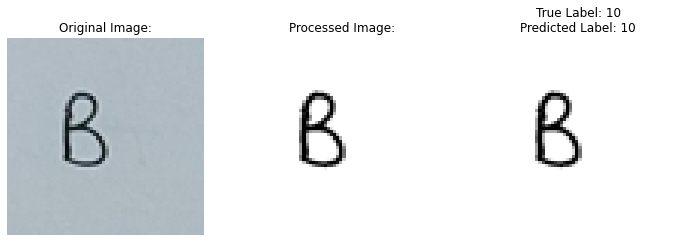

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


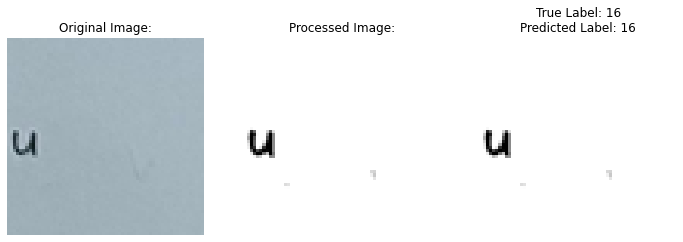

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


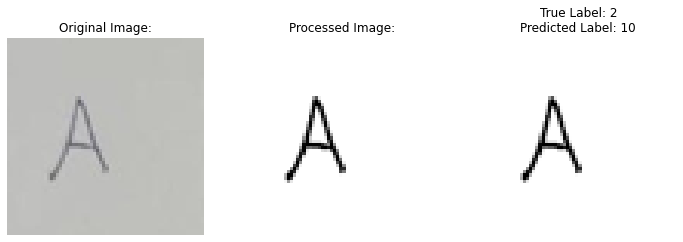

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


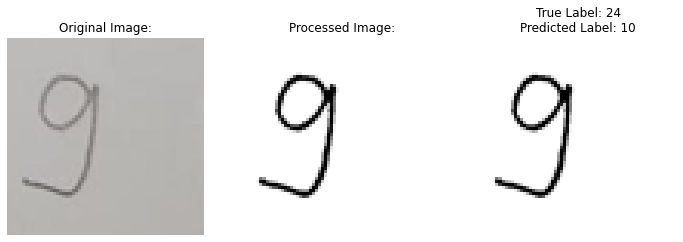

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


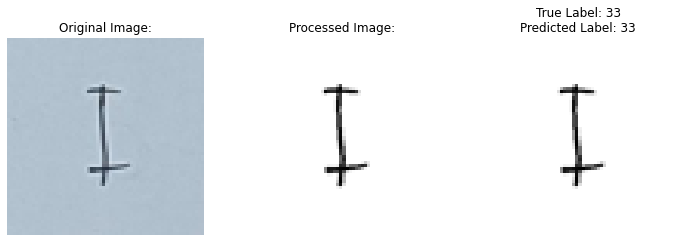

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


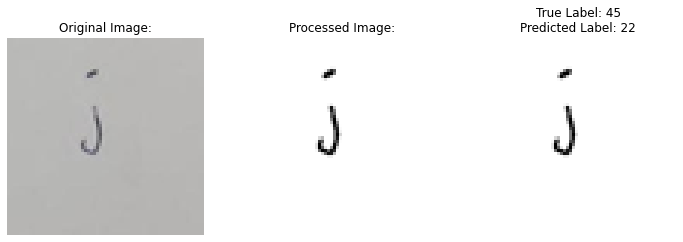

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


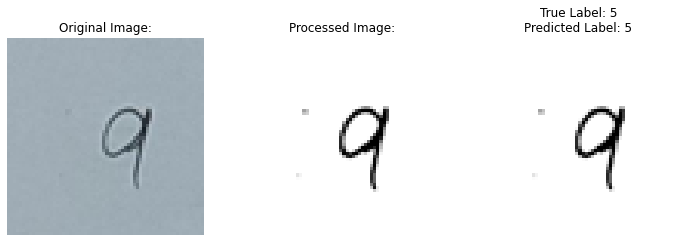

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


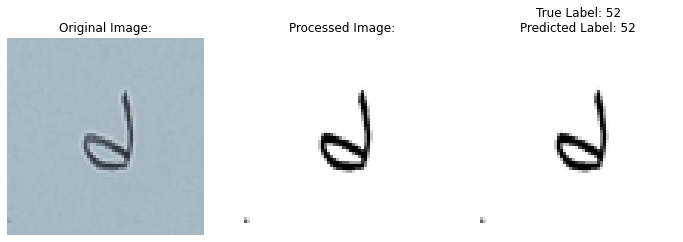

In [37]:
# Load the saved person recognition model and encoder
person_recognition_model = load_model('person_recognition_model.h5')
person_label_encoder = joblib.load('person_label_encoder.joblib')  # Assuming you have a separate encoder for person labels

# path to the demo images folder for person recognition
person_demo_images_folder = r"C:\Users\Beyza\Desktop\demo_images"  # Update the folder path accordingly

# list of image files in the folder
person_image_files = [f for f in os.listdir(person_demo_images_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image file for person recognition
for person_image_file in person_image_files:
    # Extract the numeric part of the file name
    person_label = person_image_file.split('.')[0]

    # Construct the full path to the image file
    person_image_path = os.path.join(person_demo_images_folder, person_image_file)

    # Preprocess the image for person recognition
    person_original_img_display, person_processed_img_display, person_preprocessed_image = preprocess_image(person_image_path)

    if person_preprocessed_image is not None:
        # Make a prediction for person recognition
        person_prediction = person_recognition_model.predict(person_preprocessed_image)

        # Decode the predicted label for person recognition
        person_predicted_label = person_label_encoder.classes_[np.argmax(person_prediction)]

        # Display the result for person recognition
        plt.figure(figsize=(12, 4))

        # Original image for person recognition
        plt.subplot(1, 3, 1)
        plt.imshow(person_original_img_display)
        plt.title("Original Image:")
        plt.axis("off")

        # Processed image for person recognition
        plt.subplot(1, 3, 2)
        plt.imshow(person_processed_img_display, cmap='gray')
        plt.title("Processed Image:")
        plt.axis("off")

        # Predicted label for person recognition
        plt.subplot(1, 3, 3)
        plt.imshow(person_processed_img_display, cmap='gray')
        plt.title(f"True Label: {person_label}\nPredicted Label: {person_predicted_label}")
        plt.axis("off")

        plt.show()


